In [2]:
import pandas as pd
import numpy as np

<ipython-input-2-baf368f80de7>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Let's read csv file for the data
df = pd.read_csv("cleaned_cx_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          49 non-null     int64  
 1   date_of_interaction  49 non-null     object 
 2   issue_category       49 non-null     object 
 3   time_spent_minutes   49 non-null     float64
 4   resolution_status    49 non-null     object 
 5   day_of_week          49 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ KB


In [5]:
df["date_of_interaction"] = pd.to_datetime(df['date_of_interaction'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          49 non-null     int64         
 1   date_of_interaction  49 non-null     datetime64[ns]
 2   issue_category       49 non-null     object        
 3   time_spent_minutes   49 non-null     float64       
 4   resolution_status    49 non-null     object        
 5   day_of_week          49 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.8+ KB


In [7]:
df.head()

,customer_id,date_of_interaction,issue_category,time_spent_minutes,resolution_status,day_of_week
0,1,2024-01-15,Account,15.00,Resolved,Monday
1,3,2024-01-17,Technical,33.04,Resolved,Wednesday
2,4,2024-01-18,Account,10.00,Resolved,Thursday
3,5,2024-01-19,Technical,60.00,Unresolved,Friday
4,6,2024-01-20,Billing,33.04,Resolved,Saturday


In [45]:
#lets group and resample data weekly

weekly_avg = df.resample('W')['time_spent_minutes'].mean()
weekly_index = weekly_avg.index.to_list()

In [46]:
#lets group and resample data monthly

monthly_avg = df.resample('ME')['time_spent_minutes'].mean()
monthly_index = monthly_avg.index.to_list()

In [28]:
# Let's import libraries to start the visualization
import matplotlib.pyplot as plt
%matplotlib inline

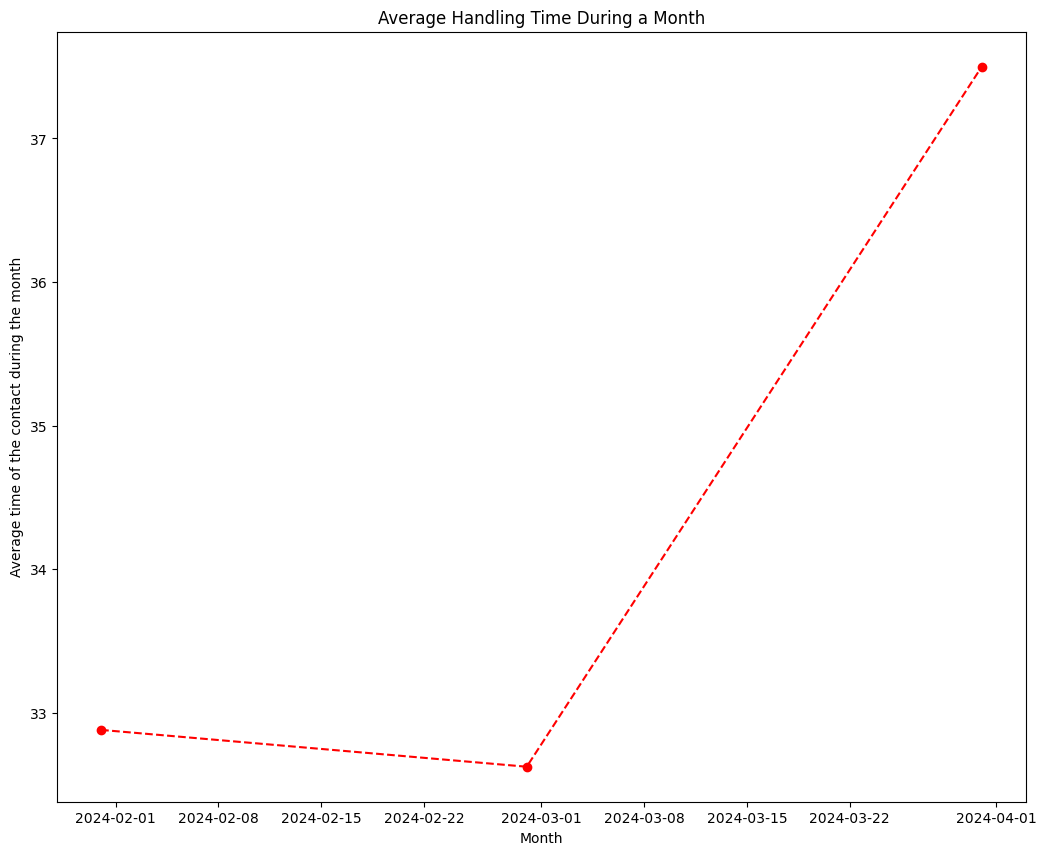

In [44]:
#now let's visualize the monthly results
plt.figure(figsize = (12.5, 10))
plt.plot(monthly_avg.index, monthly_avg, marker = 'o',
        linestyle='--',color = 'red')
plt.xlabel("Month")
plt.ylabel("Average time of the contact during the month")
plt.title("Average Handling Time During a Month")
plt.show()

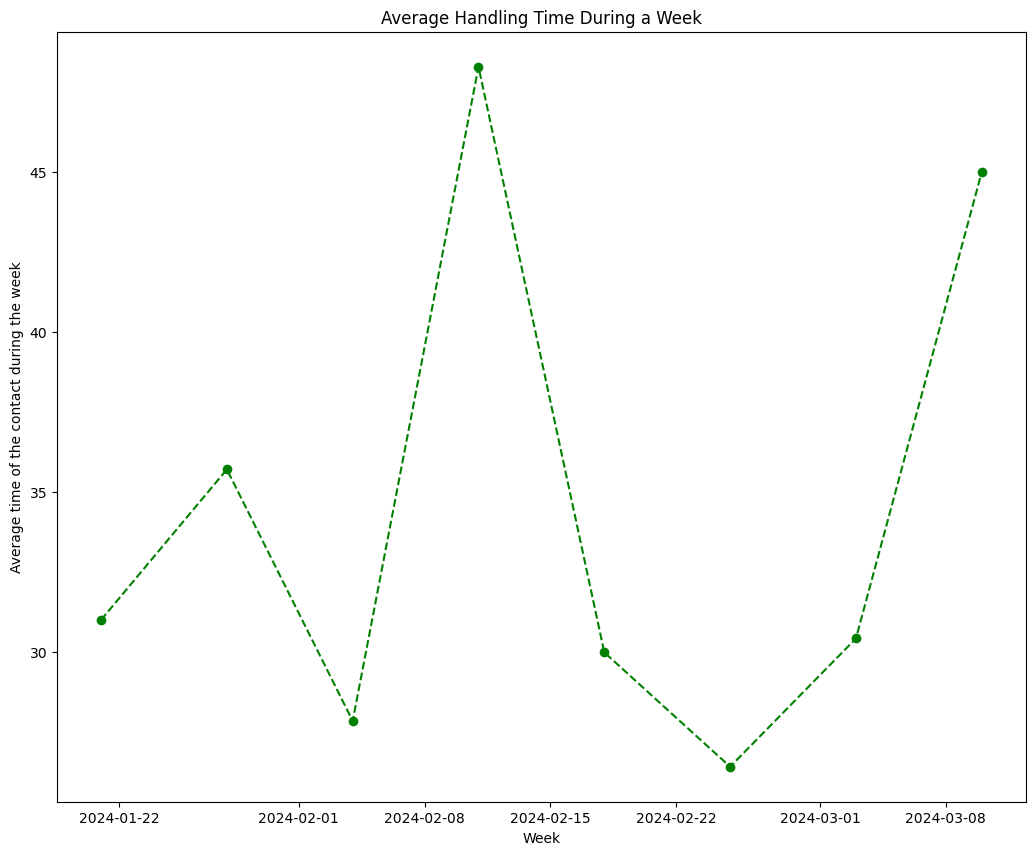

In [47]:
#now let's visualize the weekly results
plt.figure(figsize = (12.5, 10))
plt.plot(weekly_avg.index, weekly_avg, marker = 'o',
        linestyle='--',color = 'green')
plt.xlabel("Week")
plt.ylabel("Average time of the contact during the week")
plt.title("Average Handling Time During a Week")
plt.show()

In [50]:
#Since there was a peak weak, let's explore each week's / month's most common issue category

weekly_mode = df.resample('W').agg(lambda x: x.mode()[0] if not x.mode().empty else None)
monthly_mode = df.resample('ME').agg(lambda x: x.mode()[0] if not x.mode().empty else None)

In [91]:
#weekly_mode = weekly_mode.drop(columns = ["customer_id", "time_spent_minutes", "resolution_status", "day_of_week"])
weekly_mode

,issue_category
date_of_interaction,
2024-01-21,Account
2024-01-28,Account
2024-02-04,Billing
2024-02-11,Account
2024-02-18,Billing
2024-02-25,Account
2024-03-03,Billing
2024-03-10,Account


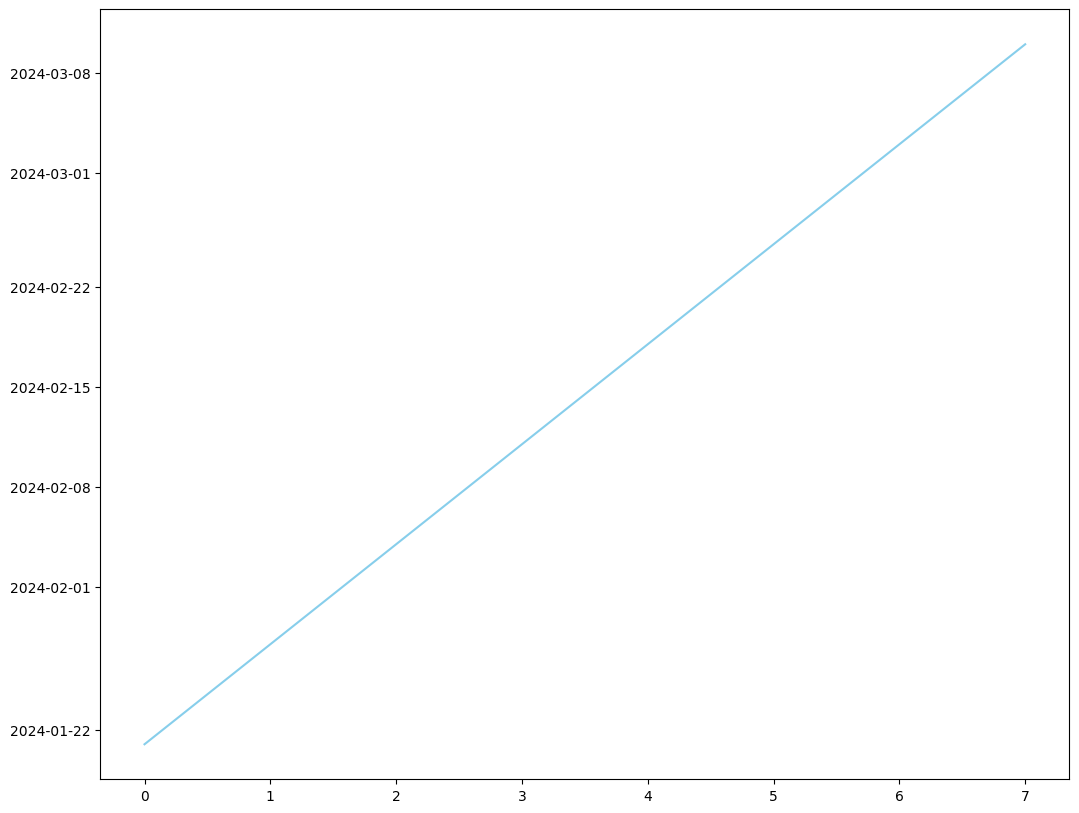

In [86]:
#now let's visualize the weekly results
categories = df.issue_category.unique().tolist()
plt.figure(figsize = (12.5, 10))
plt.plot(weekly_mode.index, color='skyblue')
# plt.xlabel("Week")
# plt.ylabel("Average time of the contact during the week")
# plt.title("Average Handling Time During a Week")
plt.show()

In [102]:
# Count the occurrences of the mode in each week
weekly_counts = df.groupby(['issue_category']).resample('W').size().unstack(fill_value=0)


In [101]:
weekly_counts

date_of_interaction,2024-01-21,2024-01-28,2024-02-04,2024-02-11,2024-02-18,2024-02-25,2024-03-03,2024-03-10
issue_category,,,,,,,,
Account,2,2,1,2,1,2,1,1
Billing,1,2,2,1,3,2,2,0
Support,1,1,2,2,1,2,2,0
Technical,2,2,2,2,2,1,2,0


In [106]:
monthly_counts = df.groupby(['issue_category']).resample('ME').size().unstack(fill_value=0)

monthly_counts

date_of_interaction,2024-01-31,2024-02-29,2024-03-31
issue_category,,,
Account,4,7,1
Billing,4,8,1
Support,3,7,1
Technical,5,7,1
